In [4]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import xlrd
import pandas as pd
import numpy as np 

In [5]:
SMB = []
HML = []
RMW = []
CMA = []
Mkt_RF = []

AllStocksFactors = []
StockName = []

In [6]:
ExcelFileName= 'cs89_results_export.xlsx'
workbook = xlrd.open_workbook(ExcelFileName)
worksheet = workbook.sheet_by_name("Sheet1") # We need to read the data  
# worksheet.nrows

for i in range (1, 30): #I made this # 6 to do some testing 
    StockName.append(worksheet.cell_value(i,0))
    StockFactor = []
    if worksheet.cell_value(i,1) <= .05:
        StockFactor.append(worksheet.cell_value(i,1))
    else:
        StockFactor.append(0)
    if worksheet.cell_value(i,2) <= .05:
        StockFactor.append(worksheet.cell_value(i,2))
    else:
        StockFactor.append(0)  
    if worksheet.cell_value(i,3) <= .05:
        StockFactor.append(worksheet.cell_value(i,3))
    else:
        StockFactor.append(0)
    if worksheet.cell_value(i,4) <= .05:
        StockFactor.append(worksheet.cell_value(i,4))
    else:
        StockFactor.append(0)
    if worksheet.cell_value(i,5) <= .05:
        StockFactor.append(worksheet.cell_value(i,5))
    else:
        StockFactor.append(0)
    
    AllStocksFactors.append(StockFactor)
    

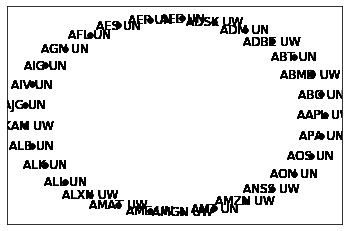

In [7]:
#Creating Graph for all of the edges to be placed on 
GTotal=nx.MultiDiGraph() #we need a MultiDiGraph so it can hold multiple edges 

for stock in StockName:
    GTotal.add_node(stock)

for g in GTotal:
    nx.draw_networkx_nodes(GTotal, pos=nx.circular_layout(GTotal), node_size=20, node_color='k', alpha=0.5)
    labels=nx.draw_networkx_labels(GTotal,pos=nx.circular_layout(GTotal), font_weight=0.2)

plt.show()

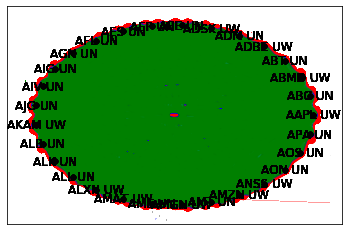

In [9]:
#Adding Edges Between Stocks which are both statistically significant for ALL factors. 
ticker=0
pos=nx.circular_layout(GTotal)

for g in GTotal:
    nx.draw_networkx_nodes(GTotal, pos, node_size=20, node_color='k', alpha=0.5)
    labels=nx.draw_networkx_labels(GTotal,pos, font_weight=0.2)

for stock in StockName:
    index_stock= StockName.index(stock)

    for stock2 in StockName:
        index_stock2= StockName.index(stock2)
        if stock != stock2:
            
            #SMB - blue 
            if AllStocksFactors[index_stock][0] == AllStocksFactors[index_stock2][0]: 
                ticker=0
            else:
                GTotal.add_edge(stock, stock2)
                nx.draw_networkx_edges(GTotal, pos, edge_list= [stock, stock2], width=6, alpha = 0.5, edge_color= 'b')
            
            #HML - green
            if AllStocksFactors[index_stock][1] == AllStocksFactors[index_stock2][1]:
                ticker=0
            else:
                GTotal.add_edge(stock, stock2)
                nx.draw_networkx_edges(GTotal, pos, edge_list= [stock, stock2], width=5, alpha = 0.5, edge_color= 'g')
             
            #RMW - red 
            if AllStocksFactors[index_stock][2] == AllStocksFactors[index_stock2][2]:
                ticker=0
            else:
                GTotal.add_edge(stock, stock2)
                nx.draw_networkx_edges(GTotal, pos, edge_list= [stock, stock2], width=10, alpha = 0.5, edge_color= 'r')
            
            #CMA - magenta
            if AllStocksFactors[index_stock][3] == AllStocksFactors[index_stock2][3]:
                ticker=0
            else:
                GTotal.add_edge(stock, stock2)
                nx.draw_networkx_edges(GTotal, pos, edge_list= [stock, stock2], width=12, alpha = 0.5, edge_color= 'm')
            
            #Mkt_RF - cyan
            if AllStocksFactors[index_stock][4] == AllStocksFactors[index_stock2][4]:
                ticker=0
            else:
                GTotal.add_edge(stock, stock2)
                nx.draw_networkx_edges(GTotal, pos, edge_list= [stock, stock2], width=2, alpha = 0.5, edge_color= 'c')
plt.show()

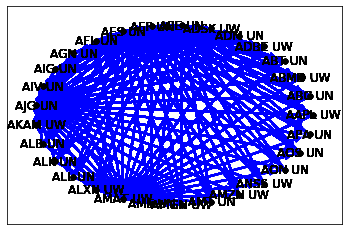

In [8]:
#New Graph for SMB significance
GSMB=nx.MultiDiGraph()
ticker=0 

for stock in StockName:
    GSMB.add_node(stock) # add nodes 
pos=nx.circular_layout(GSMB)

for g in GSMB:
    nx.draw_networkx_nodes(GSMB, pos, node_size=20, node_color='k', alpha=0.5)
    labels=nx.draw_networkx_labels(GSMB,pos,font_weight=0.2)

#Adding Edges Between Stocks which are both statistically significant for SMB 
for stock in StockName:
    index_stock= StockName.index(stock) 
    for stock2 in StockName:
        index_stock2= StockName.index(stock2)
        if stock != stock2:   
            if AllStocksFactors[index_stock][0] == AllStocksFactors[index_stock2][0]: 
                ticker = 1
            else:
                GSMB.add_edge(stock, stock2)
                nx.draw_networkx_edges(GSMB, pos, edge_list= [stock, stock2], width=2, alpha = 0.5, edge_color= 'b')

plt.show() # graph with edges 

In [ ]:
#New Graph for HML significance
GHML=nx.Graph()
ticker=0 

for stock in StockName:
    GHML.add_node(stock) # add nodes 
    
pos=nx.circular_layout(GHML)

for g in GHML:
    nx.draw_networkx_nodes(GHML, pos, node_size=20, node_color='k', alpha=0.5)
    labels=nx.draw_networkx_labels(GHML,pos, font_weight=0.2)

plt.show() # graph with no edges 

#Adding Edges Between Stocks which are both statistically significant for HML
for stock in StockName:
    index_stock= StockName.index(stock)
    
    for stock2 in StockName:
        index_stock2= StockName.index(stock2)
        if stock != stock2:
            #HML
            if AllStocksFactors[index_stock][1] == AllStocksFactors[index_stock2][1]:
                ticker=1
            else:
                GHML.add_edge(stock, stock2)
                nx.draw_networkx_edges(GHML, pos, edge_list= [stock, stock2], width=2, alpha = 0.5, edge_color= 'g')
plt.show() # graph with edges 

In [ ]:
#New Graph for RMW significance
GRMW=nx.Graph() 
ticker=0

for stock in StockName:
    GRMW.add_node(stock) # add nodes 

pos=nx.circular_layout(GRMW)


for g in GRMW:
    nx.draw_networkx_nodes(GRMW, pos, node_size=30, node_color='k', alpha=0.5)
    labels=nx.draw_networkx_labels(GRMW,pos, font_weight=0.2)

#Adding Edges Between Stocks which are both statistically significant for RMW

for stock in StockName:
    index_stock= StockName.index(stock)

    for stock2 in StockName:
        index_stock2= StockName.index(stock2)
        if stock != stock2:
              #RMW
            if AllStocksFactors[index_stock][2] == AllStocksFactors[index_stock2][2]:
                ticker=1 
            else:
                GRMW.add_edge(stock, stock2)
                nx.draw_networkx_edges(GRMW, pos, edge_list= [stock, stock2], width=4, alpha = 0.5, edge_color= 'r')
plt.show() 

In [ ]:
#New Graph for CMA significance
GCMA=nx.Graph()
ticker=0

for stock in StockName:
    GCMA.add_node(stock) # add nodes 
pos=nx.circular_layout(GCMA)

for g in GCMA:
    nx.draw_networkx_nodes(GCMA, pos, node_size=20, node_color='k', alpha=0.5)
    labels=nx.draw_networkx_labels(GCMA,pos, font_weight=0.2)

#Adding Edges Between Stocks which are both statistically significant for CMA

for stock in StockName:
    index_stock= StockName.index(stock)

    for stock2 in StockName:
        index_stock2= StockName.index(stock2)
        if stock != stock2:
             #CMA
            if AllStocksFactors[index_stock][3] == AllStocksFactors[index_stock2][3]:
                ticker=1
            else:
                GCMA.add_edge(stock, stock2)
                nx.draw_networkx_edges(GCMA, pos, edge_list= [stock, stock2], width=6, alpha = 0.5, edge_color= 'm')
plt.show() 

In [ ]:
#New Graph for Mkt_RF significance
GMkt_RF=nx.Graph()
ticker=0

for stock in StockName:
    GMkt_RF.add_node(stock) # add nodes 
pos=nx.circular_layout(GMkt_RF)


for g in GMkt_RF:
    nx.draw_networkx_nodes(GMkt_RF, pos, node_size=20, node_color='k', alpha=0.5)
    labels=nx.draw_networkx_labels(GMkt_RF,pos, font_weight=0.2)
 # graph with no edges 


#Adding Edges Between Stocks which are both statistically significant for Mkt_RF

for stock in StockName:
    index_stock= StockName.index(stock)

    for stock2 in StockName:
        index_stock2= StockName.index(stock2)
        if stock != stock2:
               #Mkt_RF
            if AllStocksFactors[index_stock][4] == AllStocksFactors[index_stock2][4]:
                ticker=1
            else:
                GMkt_RF.add_edge(stock, stock2)
                nx.draw_networkx_edges(GMkt_RF, pos, edge_list= [stock, stock2], width=6, alpha = 0.5, edge_color= 'c')

plt.show()